## Import modules: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

import bokeh.io
import bokeh.plotting
import holoviews as hv 
import hvplot
import hvplot.pandas

## Function definitions: 

In [3]:
def essential_subset(df, subset_cols, subset_name):
    df_temp = df[['Rv_ID', 'gene_name']+subset_cols].copy()
    df_temp[subset_name] = df_temp.sum(numeric_only=True, axis = 1)
    
    df_temp.sort_values(by=subset_name, ascending=False, inplace=True)
    df_temp.reset_index(inplace=True, drop=True)
    df_temp = df_temp[['Rv_ID', 'gene_name', subset_name] + subset_cols]
    
    return df_temp

## Files and paths: 

In [4]:
dir_data = '../../data/standardized_data/'
dir_figs = '../../figures/Tn_mat_stats/'

Load binary dataset: 

In [5]:
# version = 'old'
version = 'clare_basis'
# version = 'clare_all'


Creating a binary dataset giving a 1 value to every experiment that has a p value < 0.05 and a logfold scale 2 > 1

In [6]:
if version == 'old':
    bin_file = os.path.join(dir_data, 'result_bin_matrix_2020_08_27.csv') ## data set without Claire's screens
elif version == 'clare_all':
    bin_file = os.path.join(dir_data, 'result_bin_matrix_2021_08_27.csv') ## data set with all of Claire's pairwise combinations
elif version == 'clare_basis':
    bin_file = os.path.join(dir_data, 'result_bin_matrix_2021_08_27_BASIS.csv') ## data set only Claire's mutant vs. wildtype screens
    lfc_file = os.path.join(dir_data, 'result_logfc_matrix_2021_08_27_BASIS.csv') ## data set only Claire's mutant vs. wildtype screens

df_lfc = pd.read_csv(lfc_file )
df_bin = pd.read_csv(bin_file)
df_bin.head(2)
df_lfc.head(2)

Rv_ID  PE35_KO_vs_mbio_H37Rv  PPE68_KO_vs_mbio_H37Rv  Rv0950c_KO_vs_CB_WT  \
0  Rv0001                  -0.41                    0.01                  0.0   
1  Rv0002                   3.28                    2.38                  0.0   

   Rv0954_KO_vs_RJ_WT  Rv1096_KO_vs_CB_WT  \
0                 0.0                 0.0   
1                 0.0                 0.0   

   Rv3005c_KO_day32_vs_dejesus_H37Rv_day32  Rv3594_KO_vs_Rubin_FLUTE_WT  \
0                                     3.12                        -0.06   
1                                     0.00                         0.00   

   Rv3684_KO_vs_CB_WT  Rv3717_KO_vs_Rubin_FLUTE_WT  ...  Cast.EiJ_vs_C57BL.6J  \
0                 0.0                        -0.06  ...                   0.0   
1                 0.0                         0.00  ...                   0.0   

   IFNG_vs_C57BL.6J  NOD.ShiLtJ_vs_C57BL.6J  NOS_vs_C57BL.6J  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   

   NZO.H1LtJ_vs_C57BL.6J  PWK.PhJ_vs_C57BL.6J  Phox_vs_C57BL.6J  \
0                    0.0                 0.22               0.0   
1                    0.0                 0.00               0.0   

   Rag_vs_C57BL.6J  Wsb.Eij_vs_C57BL.6J  in_vitro_vs_C57BL.6J  
0              0.0                 0.00                   0.0  
1              0.0                 0.27                   0.0  

[2 rows x 126 columns]

In [7]:
df_bin['sum_CES'] = df_bin.sum(numeric_only=True, axis = 1)

### Annotations: 

In [8]:
#### COG
file_cog = '../../data/annotations/H37Rv_COG_mapping.xlsx'
df_cog_map = pd.read_excel(file_cog)

file_cog_def = '../../data/annotations/cog_names.csv'
df_cog_def = pd.read_csv(file_cog_def)
df_cog_def.rename(columns = {'COG_Desc':'cog_annot'}, inplace = True)

#merge mapping with definitions: 
df_cog_map_def = df_cog_map.merge(df_cog_def, how='left', on = 'COG')
# Merge with binary matrix:
df_bin_cog = df_bin.merge(df_cog_map, how = 'left', on = 'Rv_ID')

#### Tuberculist
file_tub = '../../data/annotations/H37Rv_tuberculist_functional_categories.xlsx'
df_tub = pd.read_excel(file_tub)
df_tub.rename(columns = {'category':'func_tuberculist'}, inplace = True)
# merge
df_bin_annot = df_bin_cog.merge(df_tub, how = 'left', on = 'Rv_ID')
df_bin_annot = df_bin_annot[['Rv_ID', 'gene_name', 'func_tuberculist', 'COG'] + list(df_bin.columns[1:])]
df_bin_annot.iloc[:,:4].head(3)
df_bin_annot.head()

Rv_ID gene_name         func_tuberculist COG  PE35_KO_vs_mbio_H37Rv  \
0  Rv0001      dnaA     information pathways   L                    0.0   
1  Rv0002      dnaN     information pathways   L                    0.0   
2  Rv0003      recF     information pathways   L                    0.0   
3  Rv0004         -  conserved hypotheticals   R                    0.0   
4  Rv0005      gyrB     information pathways   L                    0.0   

   PPE68_KO_vs_mbio_H37Rv  Rv0950c_KO_vs_CB_WT  Rv0954_KO_vs_RJ_WT  \
0                     0.0                  0.0                 0.0   
1                     0.0                  0.0                 0.0   
2                     0.0                  0.0                 1.0   
3                     0.0                  0.0                 0.0   
4                     0.0                  0.0                 0.0   

   Rv1096_KO_vs_CB_WT  Rv3005c_KO_day32_vs_dejesus_H37Rv_day32  ...  \
0                 0.0                                      0.0  ...   
1                 0.0                                      0.0  ...   
2                 0.0                                      0.0  ...   
3                 0.0                                      0.0  ...   
4                 0.0                                      0.0  ...   

   IFNG_vs_C57BL.6J  NOD.ShiLtJ_vs_C57BL.6J  NOS_vs_C57BL.6J  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     1.0              1.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   NZO.H1LtJ_vs_C57BL.6J  PWK.PhJ_vs_C57BL.6J  Phox_vs_C57BL.6J  \
0                    0.0                  0.0               0.0   
1                    0.0                  0.0               0.0   
2                    0.0                  0.0               0.0   
3                    0.0                  0.0               0.0   
4                    0.0                  0.0               0.0   

   Rag_vs_C57BL.6J  Wsb.Eij_vs_C57BL.6J  in_vitro_vs_C57BL.6J  sum_CES  
0              0.0                  0.0                   0.0      1.0  
1              0.0                  0.0                   0.0      0.0  
2              0.0                  1.0                   0.0     23.0  
3              0.0                  0.0                   0.0      1.0  
4              0.0                  0.0                   0.0      2.0  

[5 rows x 130 columns]

# Rank columns by the number of essential genes. 

In [9]:
df_bin.sum(numeric_only=True).sort_values(ascending = False).head(20)

sum_CES                                          23736.0
dejesus_Rv1432_day0_vs_dejesus_H37Rv_day0          798.0
dejesus_Rv1565c_day32_vs_dejesus_H37Rv_day32       736.0
zhang_wt_mouse_d45_vs_zhang_input_library          627.0
C57BL.6J_vs_mbio_H37Rv                             608.0
dejesus_Rv1432_day32_vs_dejesus_H37Rv_day32        597.0
dejesus_H37Rv_day32_vs_dejesus_H37Rv_day0          594.0
dejesus_Rv2680_day32_vs_dejesus_H37Rv_day32        579.0
Rv3005c_KO_day32_vs_dejesus_H37Rv_day32            578.0
dejesus_Rv2680_day0_vs_dejesus_H37Rv_day0          552.0
dejesus_Rv1565c_day0_vs_dejesus_H37Rv_day0         552.0
griffin_glycerol_vs_mbio_H37Rv                     503.0
carey_621_vs_carey_rv                              455.0
dejesus_Rv2680_day32_vs_dejesus_Rv2680_day0        426.0
minato_minimal_plate_vs_minato_rich_plate          419.0
nambi_2015_ctpC_vs_nambi_2015_wt                   406.0
marP_KO_vs_marP_WT                                 368.0
zhang_Tyloxapol_pH_6.5_vs_zhang

Visualize: 

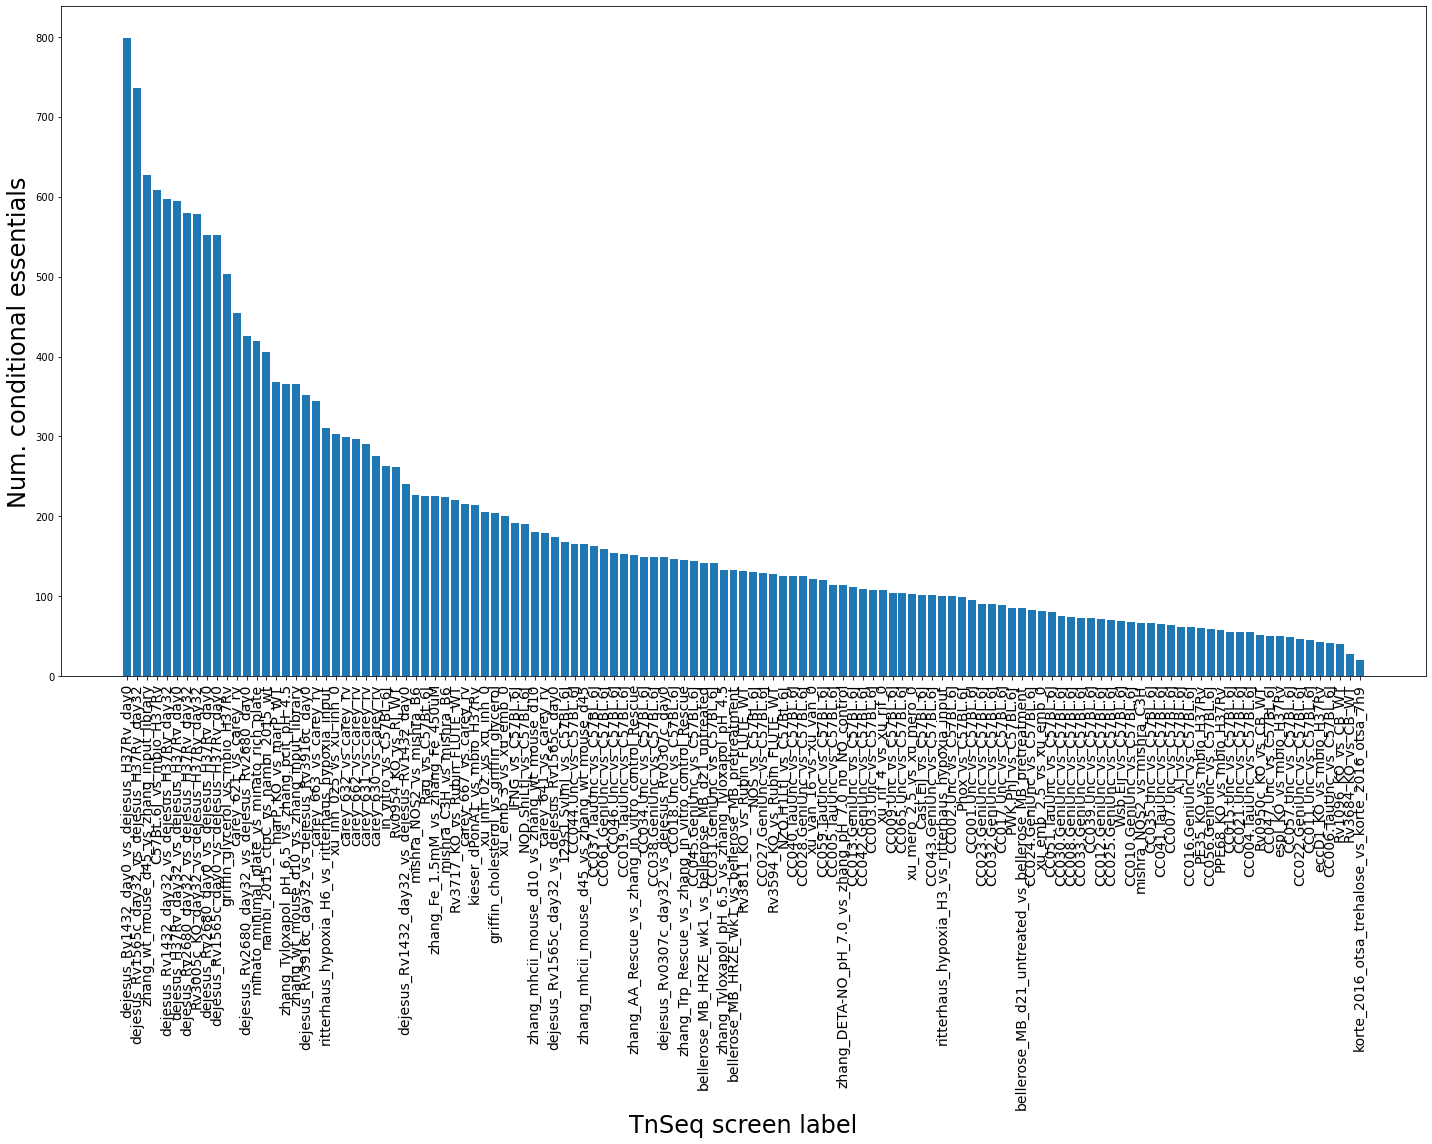

In [10]:
df_Tn_screen_stats = df_bin[df_bin.columns[:-1]].sum(numeric_only=True).sort_values(ascending = False)
vals = df_Tn_screen_stats.values
labels = df_Tn_screen_stats.keys()
xvals = np.arange(len(vals))
plt.figure(figsize = (20,16))
plt.bar(xvals, vals)
plt.ylabel('Num. conditional essentials', fontsize = 24)
xt = plt.xticks(xvals, np.array(labels), rotation = 90, fontsize = 14)
plt.xlabel('TnSeq screen label', fontsize = 24)
plt.tight_layout()
file_out = os.path.join(dir_figs, 'Tn_screen_stats.png')
# plt.savefig(file_out, dpi = 300)


# Rank genes by the number of times they're essential across conditions: 

In [11]:
df_rv_sum = df_bin[['Rv_ID', 'sum_CES']].copy()
df_rv_sum['Rv_num'] = np.arange(df_rv_sum.shape[0])
df_rv_sum.head(5)

Rv_ID  sum_CES  Rv_num
0  Rv0001      1.0       0
1  Rv0002      0.0       1
2  Rv0003     23.0       2
3  Rv0004      1.0       3
4  Rv0005      2.0       4

In [12]:
df_xticks = df_rv_sum[df_rv_sum.Rv_ID.isin(['Rv0001', 'Rv0500', 'Rv1000c', 'Rv1500', 'Rv2000', 'Rv2500c', 'Rv3000', 'Rv3500c', 'Rv3900c'])]

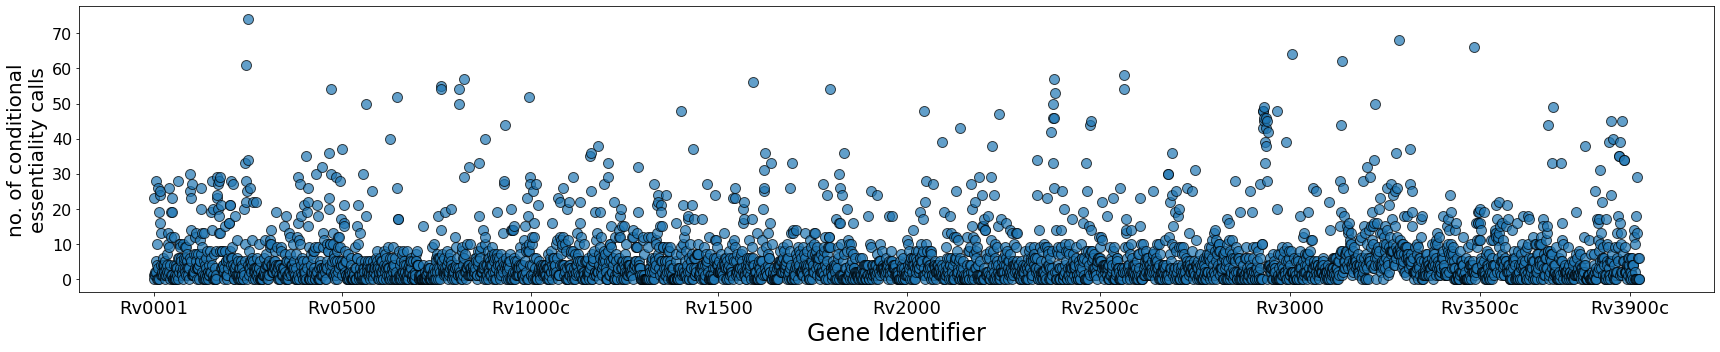

In [13]:
plt.figure(figsize=(24,5))
plt.scatter(df_rv_sum.Rv_num, df_rv_sum.sum_CES, s = 100, edgecolors='k', alpha = 0.7)
# plt.ylim(0, 30)
xt = plt.xticks(list(df_xticks.Rv_num), list(df_xticks.Rv_ID), fontsize = 18)
plt.xlabel('Gene Identifier', fontsize = 24)
yt = plt.yticks(fontsize = 16)
plt.ylabel('no. of conditional\nessentiality calls', fontsize = 20)
plt.tight_layout()


#### sliding window average:

In [14]:
window_size = 4
list_mean_counts = []
for i in range(0, df_rv_sum.shape[0] - window_size):
    window = range(i, i+window_size)
    df_temp = df_rv_sum.iloc[window]
    mean_counts = df_temp.sum_CES.mean()
    list_mean_counts.append(mean_counts)

In [15]:
df_rv_sum_window = df_rv_sum[2:-2].copy()
df_rv_sum_window['mean_sum_CES'] = list_mean_counts

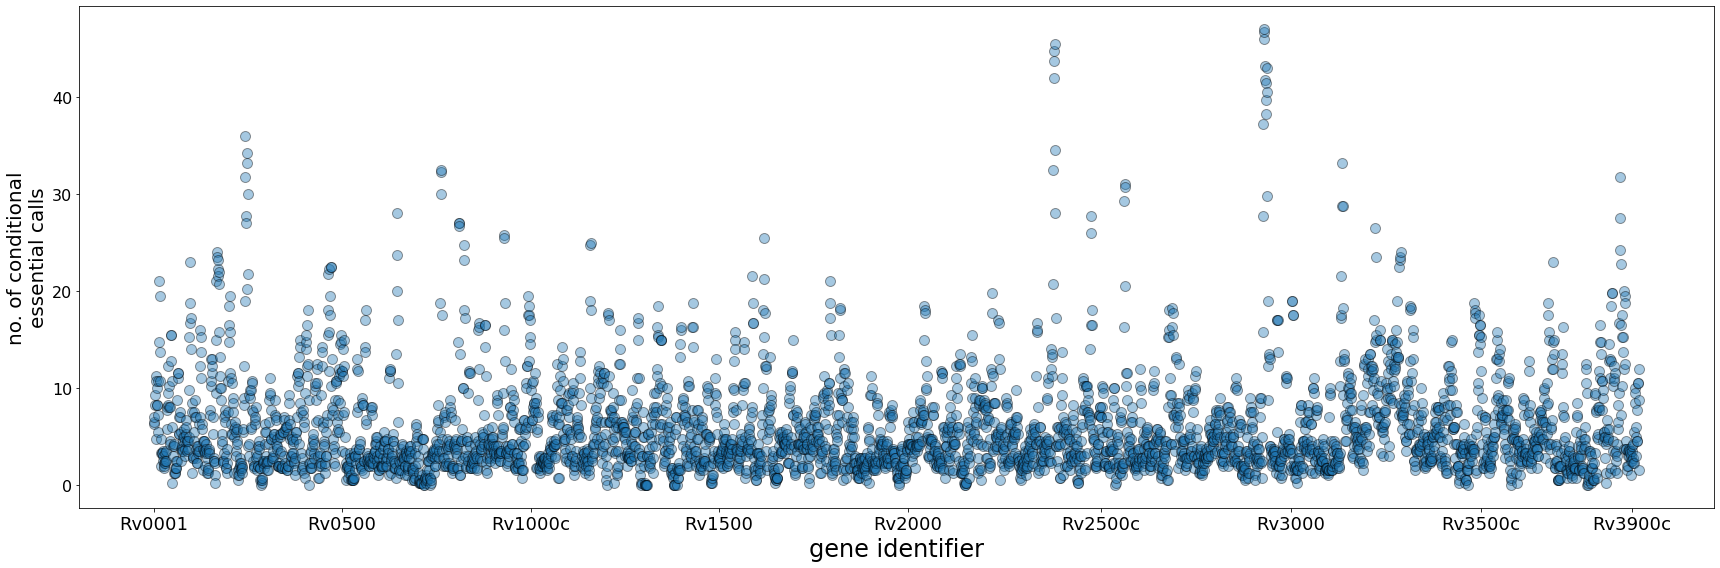

In [16]:
plt.figure(figsize=(24,8))
plt.scatter(range(df_rv_sum.shape[0] - window_size), list_mean_counts, s = 100, edgecolors='k', alpha = 0.4)
# plt.plot(range(df_rv_sum.shape[0] - window_size), list_mean_counts, 'k')
# plt.ylim(0, 26)
xt = plt.xticks(list(df_xticks.Rv_num), list(df_xticks.Rv_ID), fontsize = 18)
plt.xlabel('gene identifier', fontsize = 24)
yt = plt.yticks(fontsize = 16)
plt.ylabel('no. of conditional\nessential calls', fontsize = 20)
plt.tight_layout()

file_out = os.path.join(dir_figs, 'Tn_manhattan_window_4.png')
# plt.savefig(file_out, dpi = 300)

#### Interactive version: 

Creating a df where you can list all the experiments that have a 1 in the binary table. 

In [17]:
df_rv_sum_window.hvplot.scatter(
    x = 'Rv_num', 
    y = 'mean_sum_CES', xlabel="Gene Identifier", ylabel="Mean sum CES",
    hover_cols = ['Rv_ID', 'sum_CES'],
    cmap = 'Accent', 
    alpha = 0.4,
    padding = 0.1, 
    size = 55,
    width = 1300,
    height = 500
)

:Scatter   [Rv_num]   (mean_sum_CES,Rv_ID,sum_CES)

In [18]:
#Creating a list of all the experiments. 
columns = df_bin_annot.columns[4:-1]
Exp_dict = {}

#Creating a dictionary where all the significant experiments (1.0) are combined with the gene of interest. 
for gene in list_RVID:
    df_temp = df_bin_annot[df_bin_annot.Rv_ID == gene]
    sig_experiments = [column for column in columns if df_temp[column].values[0] == 1.0]
    Exp_dict[gene] = sig_experiments 


NameError: name 'list_RVID' is not defined

In [70]:
#Getting the logfold changes of each gene in an array. 
gene = list_RVID[0]
cols_temp = Exp_dict[gene]

df_lfc[df_lfc.Rv_ID == gene][cols_temp].values[0]

array([ 1.12,  1.11,  2.07,  3.33, -1.33, -1.84, -1.33, -2.27,  2.35,
        1.16,  1.11, -1.43, -1.58,  2.56, -1.83, -2.42, -1.54,  1.22,
        1.17,  1.25,  1.3 ,  1.17,  1.12,  2.14,  1.15,  1.18,  1.78,
        1.42])

## How does the distribution of Log Fold Changes for each gene look like?

Creating a box plot for each loci of interest showing the log for each gene. 

In [31]:
#Load the loci df. 
df_csloci = pd.read_excel('~/Documents/repos/mtb_tn_db/data/coessential_loci.xlsx')
df_csloci.head()

locus    Rv_ID  annot_int     Gene names  \
0    1.0   Rv0243        2.0   fadA2 Rv0243   
1    1.0  Rv0244c        5.0  fadE5 Rv0244c   
2    1.0   Rv0245        1.0         Rv0245   
3    1.0   Rv0246        1.0         Rv0246   
4    1.0  Rv0248c        1.0        Rv0248c   

                                       Function [CC]  
0                                                NaN  
1  FUNCTION: Acyl-CoA dehydrogenase that exhibits...  
2                                                NaN  
3                                                NaN  
4                                                NaN

Creating a df for each loci of interest

In [43]:
df_loci1 = df_csloci[df_csloci.locus == 1.0]
df_loci2 = df_csloci[df_csloci.locus == 2.0]
df_loci3 = df_csloci[df_csloci.locus == 3.0]
df_loci4 = df_csloci[df_csloci.locus == 4.0]
df_loci5 = df_csloci[df_csloci.locus == 5.0]
df_loci6 = df_csloci[df_csloci.locus == 6.0]
df_loci7 = df_csloci[df_csloci.locus == 7.0]
df_loci8 = df_csloci[df_csloci.locus == 8.0]
df_loci9 = df_csloci[df_csloci.locus == 9.0]
df_loci10 = df_csloci[df_csloci.locus == 10.0]
df_loci11 = df_csloci[df_csloci.locus == 11.0]
df_loci12 = df_csloci[df_csloci.locus == 12.0]
df_loci13 = df_csloci[df_csloci.locus == 13.0]
df_loci14 = df_csloci[df_csloci.locus == 14.0]
list_dfloci = [df_loci1, df_loci2, df_loci3, df_loci4, df_loci5, df_loci6, df_loci7, df_loci8, df_loci9, df_loci10, df_loci11, df_loci12, df_loci13, df_loci14]

locus   Rv_ID  annot_int          Gene names  \
48   14.0  Rv3870        5.0  eccCa1 snm1 Rv3870   
49   14.0  Rv3871        5.0  eccCb1 snm2 Rv3871   

                                        Function [CC]  
48  FUNCTION: Part of the ESX-1 specialized secret...  
49  FUNCTION: Part of the ESX-1 specialized secret...

In [29]:

#Group the genes into each loci.
loci = 1.0
loci1 = df_csloci[df_csloci.locus == loci].Rv_ID.tolist()

#FOr each gene in a loci, create a dictionary of the significant screens. 

columns = df_bin_annot.columns[4:-1]
Exp_dict = {}
for gene in loci1:
    df_temp = df_bin_annot[df_bin_annot.Rv_ID == gene]
    sig_experiments = [column for column in columns if df_temp[column].values[0] == 1.0]
    Exp_dict[gene] = sig_experiments

#Parition the lfc table based on whether it's from mice or invitro experiments. 
gene = loci1[0]
CC_mice_lfc = [column for column in Exp_dict[gene] if 'C57BL' in column]
invitro_lfc = [column for column in Exp_dict[gene] if 'C57BL' not in column]

for Rv_ID in df_loci1.Rv_ID:
    

# gene = list_RVID[0]
# cols_temp = Exp_dict[gene]

# df_lfc[df_lfc.Rv_ID == gene][cols_temp].values[0]

#Getting the lfc values for the genes in subsets (CC mice, not in mice, and all data sets).

#Appending to a list of lists. 

#PLot the box plot. 
#plt.boxplot[]
CC_mice_lfc
invitro_lfc
Exp_dict

{'Rv0243': ['PE35_KO_vs_mbio_H37Rv',
  'PPE68_KO_vs_mbio_H37Rv',
  'Rv0954_KO_vs_RJ_WT',
  'Rv3005c_KO_day32_vs_dejesus_H37Rv_day32',
  'Rv3594_KO_vs_Rubin_FLUTE_WT',
  'Rv3717_KO_vs_Rubin_FLUTE_WT',
  'Rv3811_KO_vs_Rubin_FLUTE_WT',
  'dejesus_H37Rv_day32_vs_dejesus_H37Rv_day0',
  'dejesus_Rv1565c_day32_vs_dejesus_H37Rv_day32',
  'eccD1_KO_vs_mbio_H37Rv',
  'espI_KO_vs_mbio_H37Rv',
  'griffin_glycerol_vs_mbio_H37Rv',
  'minato_minimal_plate_vs_minato_rich_plate',
  'nambi_2015_ctpC_vs_nambi_2015_wt',
  'zhang_DETA-NO_pH_7.0_vs_zhang_pH_7.0_no_NO_control',
  'zhang_wt_mouse_d45_vs_zhang_input_library',
  'C57BL.6J_vs_mbio_H37Rv',
  'CC012.GeniUnc_vs_C57BL.6J',
  'CC025.GeniUnc_vs_C57BL.6J',
  'CC034.Unc_vs_C57BL.6J',
  'CC038.GeniUnc_vs_C57BL.6J',
  'CC040.TauUnc_vs_C57BL.6J',
  'CC042.GeniUnc_vs_C57BL.6J',
  'CC045.GeniUnc_vs_C57BL.6J',
  'CC059.TauUnc_vs_C57BL.6J',
  'IFNG_vs_C57BL.6J',
  'Rag_vs_C57BL.6J',
  'in_vitro_vs_C57BL.6J'],
 'Rv0244c': ['Rv0954_KO_vs_RJ_WT',
  'Rv1096_KO_vs_

In [91]:
df_csloci[df_csloci.locus == loci].Rv_ID.tolist()

['Rv0243', 'Rv0244c', 'Rv0245', 'Rv0246', 'Rv0248c', 'Rv0249c', 'Rv0250c']

In [48]:
list_a = [1,2,3,4,5,6,7,8]
[a for a in list_a if a%2 == 0]

[2, 4, 6, 8]

In [19]:
#Defining a threshold.
Th = 25
list_RVID = df_rv_sum_window[df_rv_sum_window.mean_sum_CES >= Th].head(7).Rv_ID.tolist()
list_RVID

['Rv0243', 'Rv0244c', 'Rv0245', 'Rv0246', 'Rv0248c', 'Rv0249c', 'Rv0250c']

In [18]:
df_bin_annot[ (df_bin_annot.Rv_ID.str.contains('Rv292')) |  (df_bin_annot.Rv_ID.str.contains('Rv293')) | (df_bin_annot.Rv_ID.str.contains('Rv294'))][['Rv_ID','gene_name', 'func_tuberculist' ,'sum_CES']]

Rv_ID gene_name                         func_tuberculist  sum_CES
3015  Rv2920c       amt             cell wall and cell processes     12.0
3016  Rv2921c      ftsY             cell wall and cell processes      1.0
3017  Rv2922A      acyP  intermediary metabolism and respiration      0.0
3018  Rv2922c       smc             cell wall and cell processes    190.0
3019  Rv2923c         -                  conserved hypotheticals     39.0
3020  Rv2924c       fpg                     information pathways     51.0
3021  Rv2925c       rnc                     information pathways      0.0
3022  Rv2926c         -                  conserved hypotheticals      4.0
3023  Rv2927c         -                  conserved hypotheticals      2.0
3024   Rv2928      tesA                         lipid metabolism    231.0
3025   Rv2929         -                  conserved hypotheticals    134.0
3026   Rv2930    fadD26                         lipid metabolism    786.0
3027   Rv2931      ppsA                         lipid metabolism    833.0
3028   Rv2932      ppsB                         lipid metabolism    872.0
3029   Rv2933      ppsC                         lipid metabolism    871.0
3030   Rv2934      ppsD                         lipid metabolism    882.0
3031   Rv2935      ppsE                         lipid metabolism    876.0
3032   Rv2936      drrA             cell wall and cell processes    561.0
3033   Rv2937      drrB             cell wall and cell processes    535.0
3034   Rv2938      drrC             cell wall and cell processes    717.0
3035   Rv2939     papA5                         lipid metabolism    858.0
3036  Rv2940c       mas                         lipid metabolism    825.0
3037   Rv2941    fadD28                         lipid metabolism    845.0
3038   Rv2942     mmpL7             cell wall and cell processes    459.0
3039   Rv2943         -                insertion seqs and phages      2.0
3040  Rv2943A         -                insertion seqs and phages     26.0
3041   Rv2944         -                insertion seqs and phages     85.0
3042  Rv2945c      lppX             cell wall and cell processes    554.0
3043  Rv2946c      pks1                         lipid metabolism     42.0
3044  Rv2947c     pks15                         lipid metabolism     18.0
3045  Rv2948c    fadD22                         lipid metabolism      5.0
3046  Rv2949c         -  intermediary metabolism and respiration     11.0

### Distribution of essentiality counts across genes: 

Let's start with the free stuff:
How many genes are conditionally essential in 10 or more screens? 0 screens?

In [19]:
df_bin[df_bin.sum_CES.values == 0][['Rv_ID', 'sum_CES']].shape

(434, 2)

In [20]:
df_bin[df_bin.sum_CES.values >= 10][['Rv_ID', 'sum_CES']].shape

(2575, 2)

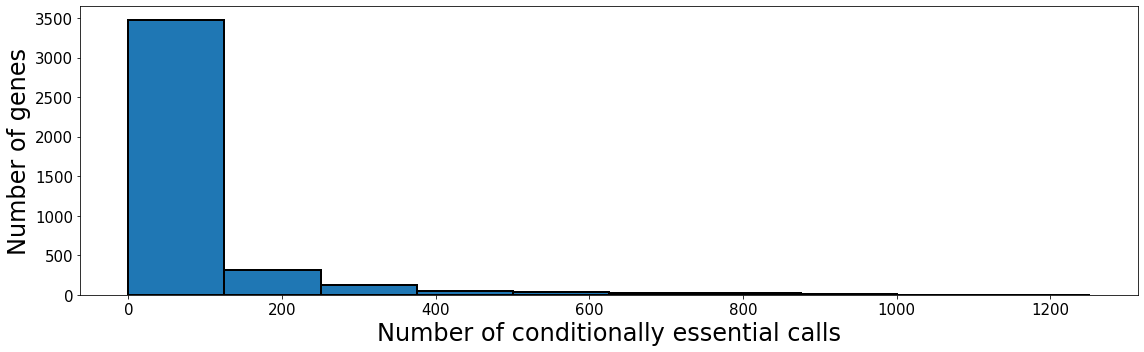

In [24]:
plt.figure(figsize = (16,5))
# hist = plt.hist(df_bin['sum_CES'].values, bins = np.arange(-0.5, 40), edgecolor='black', linewidth=2)
hist = plt.hist(df_bin['sum_CES'].values, edgecolor='black', linewidth=2)

plt.xlabel('Number of conditionally essential calls', fontsize = 24)
plt.ylabel('Number of genes', fontsize = 24)
plt.xticks(fontsize = 15)
yt = plt.yticks(fontsize = 15)
plt.tight_layout()
out_file = os.path.join(dir_figs, 'gene_stats.png')
# plt.savefig(out_file, dpi = 300)

Quick attempt at CDF plot:

In [25]:
xrange = np.arange(0, 1400)
cdf_list = []
for x in xrange:
    cdf_val = len([data for data in df_bin['sum_CES'].values if data <= x]) / len(df_bin['sum_CES'].values)
    cdf_list.append(cdf_val)

Text(0.5, 0, 'Number of conditionally essential calls')

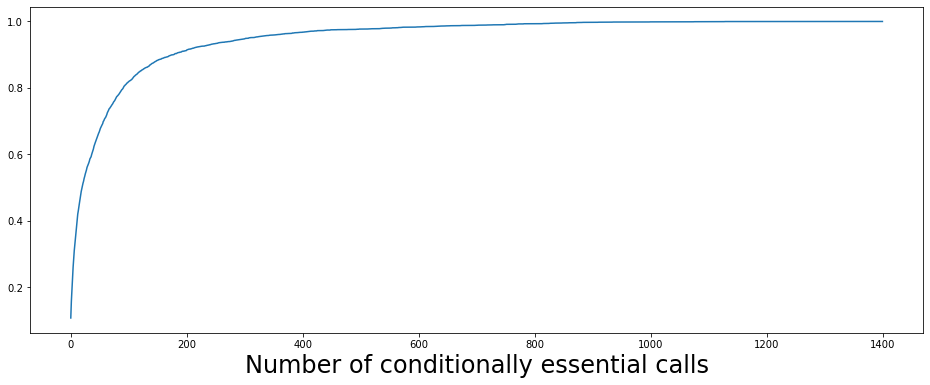

In [29]:
plt.figure(figsize = (16,6))
plt.plot(xrange, cdf_list)
plt.xlabel('Number of conditionally essential calls', fontsize = 24)

# Can we identify the core essentials in the 0-bin?

In [16]:
file_mbio = '../../data/SI_datasets/2017A_DeJesus_Iorger/table_1.xlsx'
df_mbio = pd.read_excel(file_mbio)
df_mbio['Final Call'].unique()

array(['ES', 'NE', 'ESD', 'GD', 'Uncertain', 'GA'], dtype=object)

In [17]:
df_mbio_ES = df_mbio[ (df_mbio['Final Call'].values =='ES') | (df_mbio['Final Call'].values =='GD' )].copy()

df_tn_mbio = df_bin[df_bin.Rv_ID.isin(df_mbio_ES.Rv_ID)][['Rv_ID', 'sum_CES']]
df_tn_mbio.shape

(596, 2)

In [15]:
x_vals = np.array(df_tn_mbio.sum_CES.value_counts().index)
y_vals = np.array(df_tn_mbio.sum_CES.value_counts().values)

How many of the mbio 2017 essentials have zero conditional essentiality calls?

In [16]:
df_tn_mbio[df_tn_mbio.sum_CES.values==0].shape

(425, 2)

Show these in the histogram: 

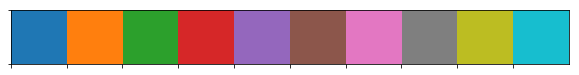

In [17]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [19]:
num_disp = df_bin[df_bin.sum_CES.values == 0].shape[0]

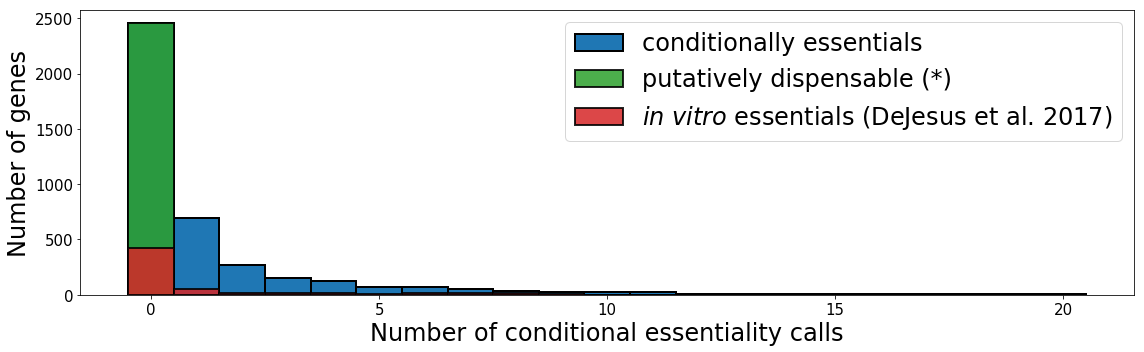

In [26]:
num_ES = df_mbio_ES.shape[0]

plt.figure(figsize = (16,5))

hist = plt.hist(df_bin['sum_CES'].values, bins = np.arange(-0.5, 21), color=current_palette[0], edgecolor='black', linewidth=2)
plt.bar(0, num_disp, color = current_palette[2], width=1, edgecolor='k', linewidth=2, alpha=0.85)
plt.bar(x_vals, y_vals, color = current_palette[3], width=1, edgecolor='k', linewidth=2, alpha=0.85)

# sns.distplot(df_tn['sum_all'].values, bins = np.arange(-0.5, 21))
plt.xlabel('Number of conditional essentiality calls', fontsize = 24)
plt.ylabel('Number of genes', fontsize = 24)
plt.xticks(fontsize = 15)
yt = plt.yticks(fontsize = 15)
plt.legend(['conditionally essentials', 'putatively dispensable (*)','$\it{in}$ $\it{vitro}$ essentials (DeJesus et al. 2017)'], fontsize = 24)
plt.tight_layout()

# out_file = os.path.join(dir_figs, 'gene_stats.png')
# plt.savefig(out_file, dpi = 300)

##### New version (02/01/2021)

In [18]:
# for the new version of the plot
df_mbio_ES_ONLY = df_mbio[ (df_mbio['Final Call'].values =='ES')].copy()
df_mbio_GD = df_mbio[ (df_mbio['Final Call'].values =='GD' )].copy()
df_mbio_GA = df_mbio[ (df_mbio['Final Call'].values =='GA' )].copy()
df_mbio_NE = df_mbio[ (df_mbio['Final Call'].values =='NE' )].copy()

# 
df_tn_mbio_ES_ONLY = df_bin[df_bin.Rv_ID.isin(df_mbio_ES_ONLY.Rv_ID)][['Rv_ID', 'sum_CES']]
df_tn_mbio_GD = df_bin[df_bin.Rv_ID.isin(df_mbio_GD.Rv_ID)][['Rv_ID', 'sum_CES']]
df_tn_mbio_GA = df_bin[df_bin.Rv_ID.isin(df_mbio_GA.Rv_ID)][['Rv_ID', 'sum_CES']]
df_tn_mbio_NE = df_bin[df_bin.Rv_ID.isin(df_mbio_NE.Rv_ID)][['Rv_ID', 'sum_CES']]

# 
xbins = np.arange(-0.5, 25.5, 1)
yx_vals_ES_ONLY = np.histogram(df_tn_mbio_ES_ONLY.sum_CES.values, bins = xbins)
yvals_ES_ONLY = yx_vals_ES_ONLY[0]

yx_vals_GD = np.histogram(df_tn_mbio_GD.sum_CES.values, bins = np.arange(-0.5, 25.5, 1))
yvals_GD = yx_vals_GD[0]

yx_vals_GA = np.histogram(df_tn_mbio_GA.sum_CES.values, bins = np.arange(-0.5, 25.5, 1))
yvals_GA = yx_vals_GA[0]

yx_vals_NE = np.histogram(df_tn_mbio_NE.sum_CES.values, bins = np.arange(-0.5, 25.5, 1))
yvals_NE = yx_vals_NE[0]

In [25]:
df_tn_mbio_ES_ONLY[df_tn_mbio_ES_ONLY.sum_CES.values == 0].shape[0] + df_tn_mbio_GD[df_tn_mbio_GD.sum_CES.values == 0].shape[0]

425

(135, 2)

In [115]:
xvals_ALL = np.arange(0, 25)

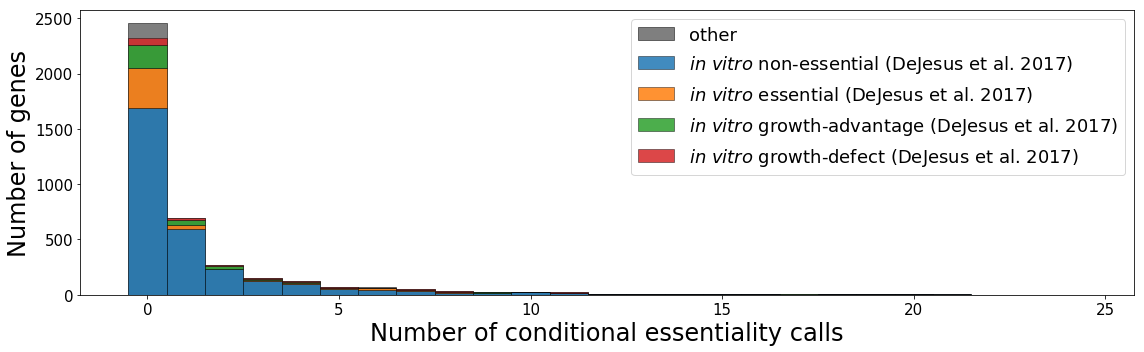

In [144]:
plt.figure(figsize = (16,5))
lw_param = 0.5

hist = plt.hist(df_bin['sum_CES'].values, bins = np.arange(-0.5, 21), color=current_palette[-3], edgecolor='black', linewidth=lw_param)

plt.bar(xvals_ALL, yvals_NE, color = current_palette[0], width=1, edgecolor='k', linewidth=lw_param, alpha=0.85)

arr_bottom = yvals_NE
plt.bar(xvals_ALL, yvals_ES_ONLY, bottom=arr_bottom , color = current_palette[1], width=1, edgecolor='k', linewidth=lw_param, alpha=0.85)

arr_bottom = arr_bottom + yvals_ES_ONLY
plt.bar(xvals_ALL, yvals_GA, bottom=arr_bottom , color = current_palette[2], width=1, edgecolor='k', linewidth=lw_param, alpha=0.85)

arr_bottom = arr_bottom + yvals_GA
plt.bar(xvals_ALL, yvals_GD, bottom=arr_bottom , color = current_palette[3], width=1, edgecolor='k', linewidth=lw_param, alpha=0.85)

plt.legend(['other', '$\it{in}$ $\it{vitro}$ non-essential (DeJesus et al. 2017)', '$\it{in}$ $\it{vitro}$ essential (DeJesus et al. 2017)', 
           '$\it{in}$ $\it{vitro}$ growth-advantage (DeJesus et al. 2017)', '$\it{in}$ $\it{vitro}$ growth-defect (DeJesus et al. 2017)'], fontsize = 18)

plt.xlabel('Number of conditional essentiality calls', fontsize = 24)
plt.ylabel('Number of genes', fontsize = 24)
plt.xticks(fontsize = 15)
yt = plt.yticks(fontsize = 15)

plt.tight_layout()

out_file = os.path.join(dir_figs, 'gene_stats_v2.png')
plt.savefig(out_file, dpi = 300)

In [145]:
file_out = '../../data/annotations/data_for_Michael_1.csv'
df_bin.to_csv(file_out, index = False)

file_out = '../../data/annotations/data_for_Michael_2.csv'
df_mbio.to_csv(file_out, index = False)

Which have 1 or more conditional essentiality calls?

In [71]:
rvid_ES_CES = df_tn_mbio[df_tn_mbio.sum_all>0].Rv_ID.values

In [67]:
def essentiality_calls(df, gene_id):
# Return the columns in which a given gene is called essential:
    cols = df.columns[1:]
    col_list = []
    for col in cols:
        if df[df['Rv_ID']==gene_id][col].values[0] == 1:
            col_list.append(col)
            
    return col_list

In [73]:
CES_list = []
for gene_id in rvid_ES_CES:
    CES_list.append(essentiality_calls(df_tn, gene_id))
df_ES_CES = pd.DataFrame()
df_ES_CES['Rv_ID'] = rvid_ES_CES
df_ES_CES['CES_calls'] = ['; '.join(CES[:-1]) for CES in CES_list]

In [75]:
file_out = '../../dep/data/ES_with_CES_calls.csv'
df_ES_CES.to_csv(file_out, index = False)

In [77]:
df_ES_CES[df_ES_CES.CES_calls.str.contains('carey')].shape

(105, 2)

### Which genes are the tail of the distribution?

In [102]:
df_tn_top_wName = df_tn_top.merge(df_mbio, how = 'left', on = 'Rv_ID')[['Rv_ID', 'sum_all', 'Name']]
file_out = '../../data/top_genes_CES_calls.xlsx'
df_tn_top_wName.to_excel(file_out, index= False)

### Cumulative distribution:

In [50]:
myrange = np.arange(df_tn['sum_all'].max())
cdf = np.zeros(len(myrange))
for n in myrange:
    cdf[int(n)] = df_tn[df_tn.sum_all<=n].shape[0] / df_tn.shape[0]

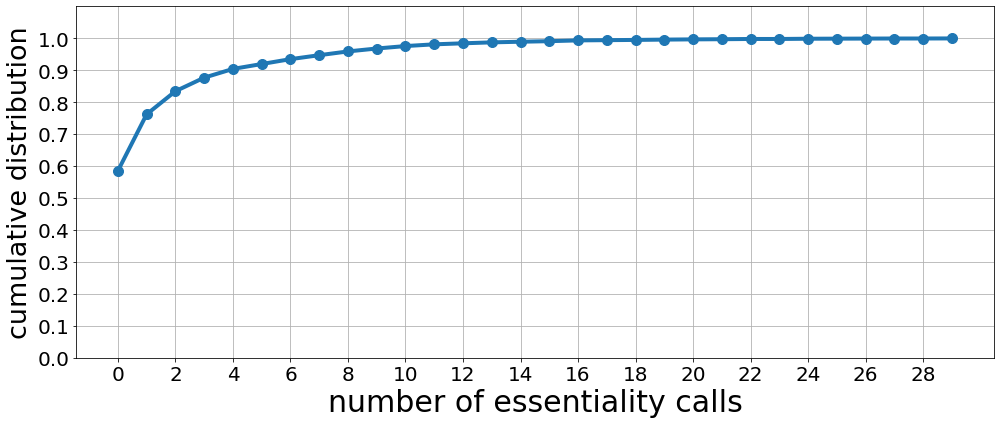

In [51]:
plt.figure(figsize = (14,6))
plt.plot(myrange, cdf, '-o', lw = 4, ms = 10)
xt = plt.xticks( np.arange(0, df_tn['sum_all'].max(), 2), fontsize = 20)
plt.ylim(0, 1.1)
yt = plt.yticks(np.arange(0, 1.1, 0.1), fontsize = 20)
plt.xlabel('number of essentiality calls', fontsize = 30)
plt.ylabel('cumulative distribution', fontsize = 27)
plt.grid(True, xdata = myrange)
plt.tight_layout()
